## Komodo Energy Coding Challenge

In [5]:
# Find out what versions of packages I have installed in my venv
#pip list

In [6]:
import numpy as np #numpy==1.24.3
import pandas as pd #pandas==2.0.3
import matplotlib.pyplot as plt #matplotlib==3.7.2
import sklearn as sl #sklearn == 1.3.0


# Data Exploration

## Household usage

In [9]:
# Read in the household usage data
energy = pd.read_csv('household_usage.csv')
energy = energy[['Time', 'Standard_Household', 'HeatPump_Household', 'HeatPump_Battery_Household']]
energy

,Time,Standard_Household,HeatPump_Household,HeatPump_Battery_Household
0,00:00,0.4,0.6,0.6
1,00:30,0.3,0.5,0.5
2,01:00,0.3,0.5,0.5
3,01:30,0.3,0.5,0.5
4,02:00,0.2,0.4,0.5
5,02:30,0.2,0.4,5.0
6,03:00,0.2,0.4,5.0
7,03:30,0.2,0.4,5.0
8,04:00,0.2,0.4,0.0
9,04:30,0.2,0.4,0.0


<Axes: xlabel='Time'>

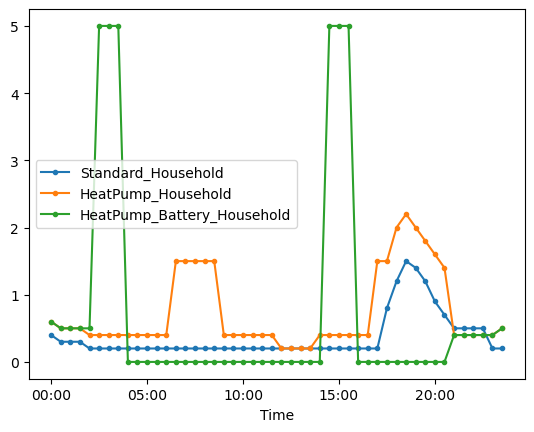

In [10]:
# Plot
energy.set_index('Time').plot(style='.-')

In [11]:
# Get some useful stats
energy.set_index('Time').describe()

,Standard_Household,HeatPump_Household,HeatPump_Battery_Household
count,48.000000,48.000000,48.000000
mean,0.366667,0.735417,0.731250
std,0.336650,0.584731,1.642152
min,0.200000,0.200000,0.000000
25%,0.200000,0.400000,0.000000
50%,0.200000,0.400000,0.000000
75%,0.325000,1.425000,0.425000
max,1.500000,2.200000,5.000000


In [12]:
# Find the time when the energy consumption is the max
e = energy.set_index('Time')
e[e==e.max()].dropna(how='all')

,Standard_Household,HeatPump_Household,HeatPump_Battery_Household
Time,,,
02:30,NaN,NaN,5.0
03:00,NaN,NaN,5.0
03:30,NaN,NaN,5.0
14:30,NaN,NaN,5.0
15:00,NaN,NaN,5.0
15:30,NaN,NaN,5.0
18:30,1.5,2.2,NaN


In [13]:
# Find the time when the energy consumption is the minimum
energy.set_index('Time').idxmin()


Standard_Household            02:00
HeatPump_Household            12:00
HeatPump_Battery_Household    04:00
dtype: object

In [14]:
# Find the daily energy usage
energy.set_index('Time').sum()


Standard_Household            17.6
HeatPump_Household            35.3
HeatPump_Battery_Household    35.1
dtype: float64

The standard household represents a typical UK home where the consumption is mainly in the evening.
The household are likely out during the day at work and return at 5.30pm.
There is a base load of 0.2kWh and a peak load of 1.5kWh at 18:30-19:00.

The Heat pump household has large peaks in the morning and the evening.
This is presumably when the heating/hot water are on.
The consumption is approximately double the standard household.

The Heat Pump battery household has a similar consuption to the heat pump household but the times of usage are different.
The battery is charged overight and early afternoon (presumably when the tariff is cheaper - check in the next section).
Usage is zero for most of the day until 20:30 when the charge in the battery runs out

No missing data or putliers seen. Data is for a single day.

## Tariff

In [105]:
# Read in tariff data
tariff = pd.read_json('agile_price_example.json')
tariff


,count,next,previous,results
0,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 20.95, 'value_inc_vat': 21.9..."
1,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 21.34, 'value_inc_vat': 22.4..."
2,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 24.8, 'value_inc_vat': 26.04..."
3,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 26.68, 'value_inc_vat': 28.0..."
4,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 26.5, 'value_inc_vat': 27.82..."
...,...,...,...,...
91,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 22.26, 'value_inc_vat': 23.3..."
92,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 20.7, 'value_inc_vat': 21.73..."
93,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 19.56, 'value_inc_vat': 20.5..."
94,51744,https://api.octopus.energy/v1/products/AGILE-2...,NaN,"{'value_exc_vat': 20.56, 'value_inc_vat': 21.5..."


In [204]:
# Extract the datetime and prices that include VAT
valid_from = [x['valid_from'] for x in tariff['results']]
valid_from = pd.to_datetime(pd.Series(valid_from))
value_inc_vat = [x['value_inc_vat'] for x in tariff['results']]
prices = pd.DataFrame(value_inc_vat, index=valid_from).sort_index()
prices.columns=['tariff']
prices

,tariff
2025-03-11 23:00:00+00:00,20.4120
2025-03-11 23:30:00+00:00,21.5880
2025-03-12 00:00:00+00:00,20.5380
2025-03-12 00:30:00+00:00,21.7350
2025-03-12 01:00:00+00:00,23.3730
...,...
2025-03-13 20:30:00+00:00,27.8250
2025-03-13 21:00:00+00:00,28.0140
2025-03-13 21:30:00+00:00,26.0400
2025-03-13 22:00:00+00:00,22.4070


In [156]:
prices.describe()

,tariff
count,96.000000
mean,25.921109
std,7.228227
min,18.595500
25%,21.110250
50%,23.425500
75%,27.604500
max,48.363000


<Axes: >

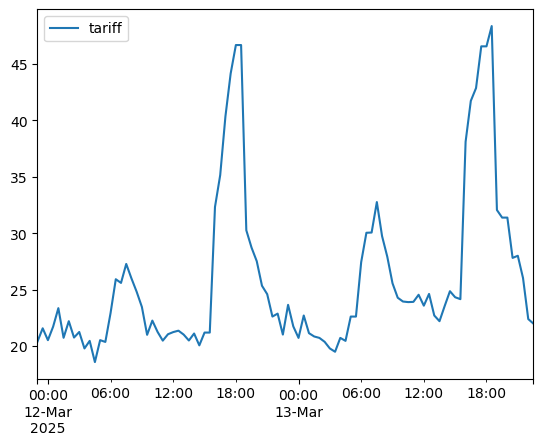

In [158]:
prices.plot()

We have data from Tues 11/3/25 23:00 to Thu 13/3/25 23:00. So 48 hours but not quite 2 full days. The pattern in the two days is similar but slightly different. There's a peak in the morning and a larger peak in the evening around 6pm when people use most energy. 

date
2025-03-11    Axes(0.125,0.11;0.775x0.77)
2025-03-12    Axes(0.125,0.11;0.775x0.77)
2025-03-13    Axes(0.125,0.11;0.775x0.77)
Name: tariff, dtype: object

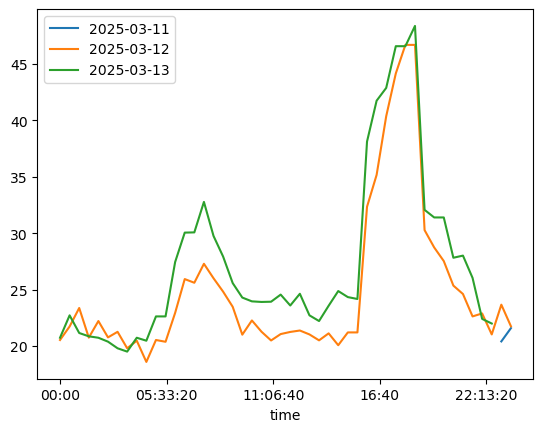

In [242]:
# Overplot the data 
prices['date']=prices.index.date
prices['time']=prices.index.time
prices.set_index('time').groupby(['date'])['tariff'].plot(legend=True)

The amplitude slightly differs between the two days, particularly the morning peak and the afternoon baseline. Peak price is around 48p/kWh and minimum price is around 19p/kWh on both days. NB These are both weekdays


No missing data or outliers seen. 


## Flexibility Event

In [272]:
# Read in flexibilty data
flex = pd.read_json('flexibility_opportunity.json')
flex

,flexibility_opportunities
0,"{'event_type': 'demand_turn_down', 'start_time..."
1,"{'event_type': 'demand_turn_up', 'start_time':..."


In [274]:
flex = pd.json_normalize(flex['flexibility_opportunities'])
flex

,event_type,start_time,end_time,price_per_kWh,min_flexibility_kWh,max_flexibility_kWh
0,demand_turn_down,18:00,19:30,1.5,1.0,5.0
1,demand_turn_up,02:00,04:00,0.5,0.5,3.0


There are two events specified - a turn down (reduce consumption) and a turn up (use excess energy). Turn down is more lucrative and could earn £7.50 if the maximum energy is saved (5kWh). If you could combine the two, i.e. move your energy use from the turn down time to the turn up time, you could earn £9 in a day